In [1]:
# Import modules
import pathlib
import sqlite3

In [2]:
# Accessing the NEO database
database_dir = pathlib.Path("../databases/neos/")
database_file = pathlib.Path("neodys.db")
database_filepath = database_dir / database_file

# Establish a connection to the database and set a cursor
neodys_db_con = sqlite3.connect(database_filepath)
neodys_db_cur = neodys_db_con.cursor()

In [3]:
import pandas as pd

# Get all information from the DB. Since the DB is rather small, this won't cause any issues!
neo_df = pd.read_sql("SELECT * FROM main", neodys_db_con)

# Close the database.
neodys_db_con.close()

In [4]:
neo_df

,Name,Epoch_MJD,SemMajAxis_AU,Ecc_,Incl_deg,LongAscNode_deg,ArgP_deg,MeanAnom_deg,AbsMag_,SlopeParamG_,Aphel_AU,Perihel_AU,NEOClass
0,433,59600.0,1.458273,0.222727,10.828461,304.296346,178.897177,246.904119,10.87,0.46,1.783070,1.133476,Amor
1,719,59600.0,2.637505,0.546959,11.575272,183.855259,156.227573,278.197185,15.53,0.15,4.080112,1.194899,Amor
2,887,59600.0,2.473158,0.570486,9.394141,110.428769,350.493276,86.607207,13.33,-0.12,3.884060,1.062256,Amor
3,1036,59600.0,2.665849,0.533122,26.677908,215.517191,132.428118,140.654843,9.41,0.30,4.087071,1.244627,Amor
4,1221,59600.0,1.918731,0.435843,11.883264,171.320251,26.643922,261.044505,17.40,0.15,2.754996,1.082467,Amor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29044,2022KY2,59600.0,1.439076,0.290852,9.562666,220.831102,344.748373,308.992894,24.82,0.15,1.857634,1.020519,Amor
29045,2022KZ,59600.0,1.404505,0.389038,10.755270,64.554335,243.245936,257.305079,26.44,0.15,1.950911,0.858099,Apollo
29046,2022KZ1,59600.0,1.643745,0.562916,31.322592,63.673736,262.310279,276.670518,26.14,0.15,2.569035,0.718455,Apollo
29047,2022KZ2,59600.0,1.342108,0.412424,13.556790,237.807367,283.141272,319.777066,26.25,0.15,1.895626,0.788590,Apollo


In [5]:
# Now we create a function to compute the size of the NEOs
import math
def comp_neo_diameter(abs_mag : float, albedo : float=0.15):
    """
    Function to compute the diameter of NEOs based on their absolute magnitude and albedo. If no
    albedo is provided, a default value of 0.15 is assumed.
    
    The result is provided in km.

    Parameters
    ----------
    abs_mag : float
        The NEO's absolute magnitude.
    albedo : float, default = 0.15
        The NEO's albedo.
    """
    
    # Compute the diameter in km
    neo_diam_km = ((10.0 ** (-0.2 * abs_mag))/(math.sqrt(albedo))) * 1329.0
    
    return neo_diam_km

In [6]:
import numpy as np

# Let's convert the absolute magnitude to the corresponding sizes
neo_diam_array = np.array([round(comp_neo_diameter(k),2) for k in neo_df["AbsMag_"]])

# Print some statistics
print(f"Known minimum NEO diameter: {np.min(neo_diam_array)} km")
print(f"Known maximum NEO diameter: {np.max(neo_diam_array)} km")
print(f"Mean NEO diameter: {np.mean(neo_diam_array)} km")
print(f"Median NEO diameter: {np.median(neo_diam_array)} km")

Known minimum NEO diameter: 0.0 km
Known maximum NEO diameter: 341569.71 km
Mean NEO diameter: 12.064905504492412 km
Median NEO diameter: 0.07 km


In [7]:
# Some values appear to be ... weird. We check now the corresponding absolute magnitude
neo_df.sort_values(by="AbsMag_")[["Name", "AbsMag_"]]

,Name,AbsMag_
7444,2010LF64,-9.99
7437,2010LB67,0.17
3,1036,9.41
0,433,10.87
14,1866,12.44
...,...,...
22218,2020CW,32.57
24960,2021BO,32.95
6300,2008TS26,33.18
7504,2010OJ129,99.90


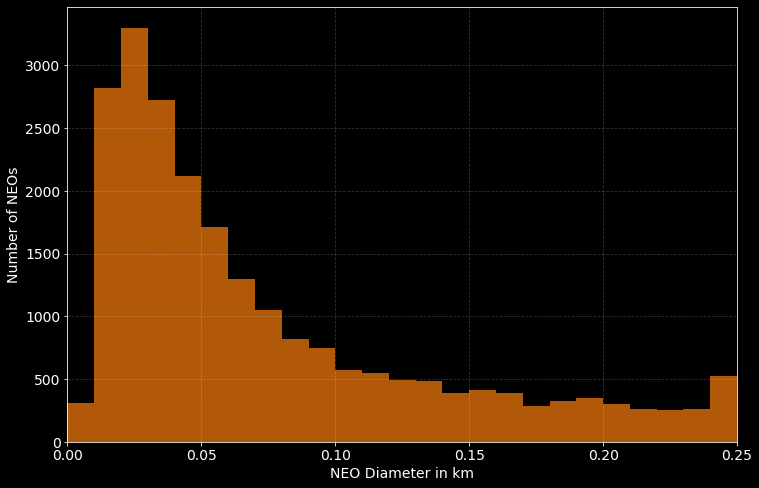

In [8]:
from matplotlib import pyplot as plt

# Define a histogram bins array
bins_range = np.arange(0, 0.26, 0.01)

# Let's set a dark background
plt.style.use('dark_background')

# Set a default font size for better readability
plt.rcParams.update({'font.size': 14})

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot a histogram of the absolute magnitude distribution
ax.hist(neo_diam_array, bins=bins_range, color='tab:orange', alpha=0.7)

# Set labels for the x and y axes
ax.set_xlabel('NEO Diameter in km')
ax.set_ylabel('Number of NEOs')

# Limit the xlim
ax.set_xlim(0, 0.25)

# Set a grid
ax.grid(axis='both', linestyle='dashed', alpha=0.2)

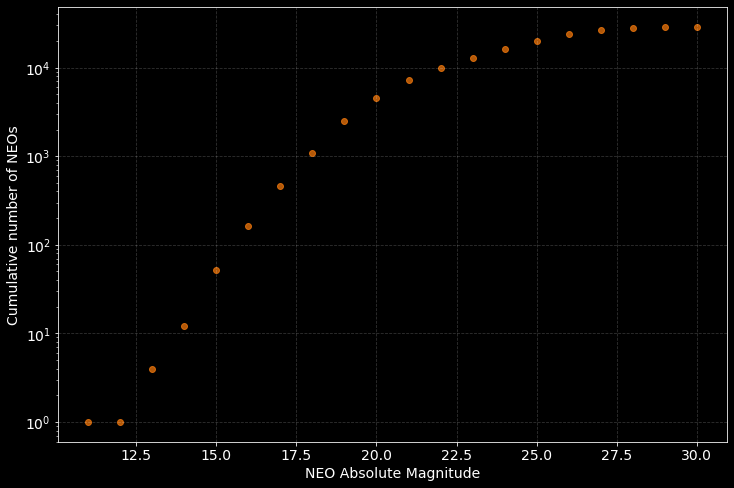

In [9]:
# Compute a cumulative distribution of the absolute magnitude
neo_absmag_hist, bins_edge = np.histogram(neo_df["AbsMag_"], \
                                       bins=np.arange(10.0, 31.0, 1.0))
cumul_neo_absmag_hist = np.cumsum(neo_absmag_hist)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create a scatter plot of the cumulative distribution.
ax.scatter(bins_edge[:-1]+1, cumul_neo_absmag_hist, color='tab:orange', alpha=0.7, \
           marker='o')

# Set labels for the x and y axes
ax.set_xlabel('NEO Absolute Magnitude')
ax.set_ylabel('Cumulative number of NEOs')

# Set a grid
ax.grid(axis='both', linestyle='dashed', alpha=0.2)

# Set a logarithmic y axis
ax.set_yscale('log')